# Analysis 1

### Zipf's Law on summaries column of movie reviews - do the words used there follow Zipf's Law?

In [1]:
# Import modules needed
import csv
import matplotlib.pyplot as plt      
import nltk
import numpy as np
import os
import pandas as pd
import re

from nltk import FreqDist
from glob import glob
from string import punctuation
from string import whitespace

%matplotlib inline

# Path to the data directory into which the cleaned data is saved.
csv_file_path = os.path.join("..", "data", "cleaned_data", "movie_reviews.csv")
if not os.path.exists(csv_file_path):
    print("{} doesn't exist - perhaps the data cleaning script needs to be run?".format(csv_file_path))

In [2]:
# read 'movie_reviews.csv' into a dataframe
review_df = pd.read_csv(csv_file_path, quoting=2, parse_dates=True, infer_datetime_format=True, encoding="UTF-8")

line_list = review_df['summary_short'].tolist()
print(line_list[:10])

['Charlie Hunnam stars in this period adventure story about love, loss and mystery in the Amazon from the director James Gray.', 'Cynthia Nixon brings a great 19th-century American poet to vivid life in Terence Davies’s new film.', '‘Norman: The Moderate Rise and Tragic Fall of a New York Fixer,’ Joseph Cedar’s latest film, pits Jew against Jew on the fringes of power and influence.', 'The director Jason Connery’s staid biopic is about the 19th-century golf pioneer Tom Morris and his son, with class conflict as a backdrop.', 'Teenage anxiety (voiced by Dash Shaw, Lena Dunham and others) takes a back seat to survival after an earthquake hits a cliffside high school.', 'In following nomads on a mission in Morocco, this tale considers the fortifying power of faith, while scrambling the viewer’s sense of time.', 'The documentary explores the artworks and pranks of an Italian trickster.', 'A family ventures beyond the bubble of gentrified Brooklyn to a small town and is thrown out of its co

In [3]:
# Utility function for determining whether a word is one which we want to keep or not.
#
# Undesirable words are composed of punctuation, or digits, or are not even strings.
#
# w - the word to check
#
# returns - True if the word should be kept, otherwise False
def is_desirable_word(w):
    # Start with some quick tests.
    if type(w) is not str:
        return False
    
    if 0 == len(w):
        return False
    
    # Remove punctuation.
    if w in str(punctuation + '’`‘'):
        return False
    
    # Remove single digits.
    if w.isdigit():
        return False
    
    # Remove numbers.
    if re.match(r'[0-9]+', w):
        return False

    # Remove 'words' that consist entirely of punctuation, including some really odd ones :(
    #'–', '—', '—:', '“', '“$', '“(', '“+', '“[', ½', '¿
    if re.match(r'[!,&#\[\]\(\)”"’`‘\'\.:;\*\$<>\?%\-_\\/–“—¿½]+', w):
        return False
    
    return True


# Define this once to be most efficient (instead of repeatedly inside the remove_html_entities function).
html_entity_pattern = re.compile("&#[0-9]+;")

# Removes HTML entities from a line.
#
# returns - the line with HTML entities replaced by spaces (to avoid accidentally concatenating words)
def remove_html_entities(l):
    # There are some HTML entities that need to be removed: e.g. &quot;
    result = l.replace("&quot;", ' ')

    result = html_entity_pattern.sub('', result)

    # These were found in the code - there are probably more, so it's better to use
    # a regex than to list them individually.  A regex is also more future-proof.
    #result = result.replace("&#151;", ' ')
    #result = result.replace("&#231;", ' ')
    #result = result.replace("&#233;", ' ')
    #result = result.replace("&#235;", ' ')
    #result = result.replace("&#237;", ' ')
    #result = result.replace("&#239;", ' ')
    #result = result.replace("&#241;", ' ')
    #result = result.replace("&#8212;", ' ')
    #result = result.replace("&#8216;", ' ')
    #result = result.replace("&#8217;", ' ')
    #result = result.replace("&#8220;", ' ')
    #result = result.replace("&#8221;", ' ')
    
    return result


# Utility function to split lines into words.
# Undesirable words are weeded out.
#
# line_list - List of lines to be split into words
# verbose - True to print additional information, default is False
# 
# returns - a list of words
def split_lines_into_words(line_list, verbose=False):
    result = []
    for l in line_list:
        if (type(l) == str):
            try:
                l = remove_html_entities(l)
                new_words = nltk.wordpunct_tokenize(l)
            
                # Canonicalize  the words by lowercasing and removing punctuation.
                new_words = [w.lower() for w in new_words if is_desirable_word(w)]
                result.extend(new_words)
                if verbose:
                    print("adding {} words => now have {} words".format(len(new_words), len(result)))
            except:
                print("[WARN] exception processing line: {}".format(l))
        
    return result


# Create lists of all words, all vocab, interesting words and interesting vocab.
all_word_list = split_lines_into_words(line_list)
all_word_count = len(all_word_list)
print(all_word_count)
print(all_word_list[0:10])

all_vocab = sorted(set(all_word_list))
all_vocab_count = len(all_vocab)
print(all_vocab_count)
print(all_vocab[0:10])

# Remove stopwords to form the 'interesting' words and vocab.
stopwords = nltk.corpus.stopwords.words('english')
interesting_word_list = [w for w in all_word_list if w not in stopwords]
interesting_word_count = len(interesting_word_list)
print(interesting_word_count)
print(interesting_word_list[0:10])

interesting_vocab = sorted(set(interesting_word_list))
interesting_vocab_count = len(interesting_vocab)
print(interesting_vocab_count)
print(interesting_vocab[0:10])

# Print statistics about the number and percentage of words removed.
removed_stopword_count = all_word_count - interesting_word_count
removed_stopword_percentage = round((100 * removed_stopword_count) / all_word_count, 2)
print("Removed {} stopwords from the corpus ({}%)".format(removed_stopword_count, removed_stopword_percentage))

removed_vocab_count = all_vocab_count - interesting_vocab_count
removed_stopword_vocab_percentage = round((100 * removed_vocab_count) / all_vocab_count, 2)
print("Removed {} stopwords from the vocab ({}%)".format(removed_vocab_count, removed_stopword_vocab_percentage))

494996
['charlie', 'hunnam', 'stars', 'in', 'this', 'period', 'adventure', 'story', 'about', 'love']
36081
['a', 'a5a', 'aa', 'aaa', 'aaja', 'aaliyah', 'aalok', 'aamir', 'aarakshan', 'aardman']
311070
['charlie', 'hunnam', 'stars', 'period', 'adventure', 'story', 'love', 'loss', 'mystery', 'amazon']
35932
['a5a', 'aa', 'aaa', 'aaja', 'aaliyah', 'aalok', 'aamir', 'aarakshan', 'aardman', 'aarniokoski']
Removed 183926 stopwords from the corpus (37.16%)
Removed 149 stopwords from the vocab (0.41%)


In [4]:
# Get a frequency distribution for the interesting words.
fd = FreqDist(interesting_word_list)
print("Number of words: {}".format(fd.N()))
print("Number of distinct words: {}".format(fd.B()))

Number of words: 311070
Number of distinct words: 35932


In [5]:
# The most common words.
fd.most_common(10)

[('film', 2642),
 ('movie', 1713),
 ('comedy', 1287),
 ('documentary', 1286),
 ('new', 1190),
 ('one', 1134),
 ('drama', 1097),
 ('young', 1068),
 ('story', 1022),
 ('man', 980)]

# Observation

The field that this set of words comes from (movie reviews) is really obvious when looking at the 10 most common words:

* film
* movie
* comedy
* documentary
* drama
* story

In [6]:
freq_list = []
for word in fd.keys():
    freq_list.append([word, fd[word]])

In [7]:
# Sort the words by frequency, from high to low.
sorted_freq_list = sorted(freq_list, key=lambda t:t[1], reverse=True)

In [8]:
# Create a Words Rank Frequency list save each elements as a sublist.
rank = 1
freq_rank_list = []
for word in sorted_freq_list:
    # Insert rank in the second position.
    word.insert(1, rank)
    rank += 1
    freq_rank_list.append(word)

In [10]:
print(freq_rank_list[:20])

[['film', 1, 2642], ['movie', 2, 1713], ['comedy', 3, 1287], ['documentary', 4, 1286], ['new', 5, 1190], ['one', 6, 1134], ['drama', 7, 1097], ['young', 8, 1068], ['story', 9, 1022], ['man', 10, 980], ['two', 11, 966], ['mr', 12, 959], ['life', 13, 913], ['old', 14, 868], ['like', 15, 842], ['good', 16, 810], ['love', 17, 746], ['directed', 18, 733], ['woman', 19, 715], ['director', 20, 695]]


In [11]:
# Writes a frequency-rank list to a CSV file.
def create_csv(frequency_rank_list, file_name):
    with open(file_name, 'w') as f:
        w = csv.writer(f)
        w.writerow(["Words", "Rank", "Frequency"]) # This is a recommended way. Do not add title in front of your list.
        for item in frequency_rank_list:           # Otherwise your list will not be reuse later. 
            w.writerow(item[:])

In [12]:
# save .csv to ana_1 folder
zipfs_outfilepath = os.path.join('.', 'ana_1', 'Zipfs_law_review_text.csv')
create_csv(freq_rank_list, zipfs_outfilepath)

In [13]:
ranks = [r[1] for r in freq_rank_list]
freqs = [f[2] for f in freq_rank_list]

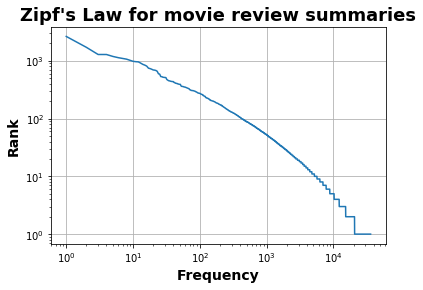

In [14]:
# Show word rank and frequency relationship in log-log plot using matplotlib 
plt.loglog(ranks, freqs)
plt.title("Zipf's Law for movie review summaries", fontsize=18, fontweight='bold')
plt.xlabel('Frequency', fontsize=14, fontweight='bold')
plt.ylabel('Rank', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

# Observations:
  * Above graph shows that review summary text words and frequency product is constant for majority of words ,though it is not true for all the words. Hence zipf's law holds true for most of the review summary words.